In [1]:
from hao.ViT import ViT
from data_ISIC import ISICDataModule
import hao.utils as u

In [2]:
img_size, patch_size, batch_size = 128, 16, 64
num_workers = 8
num_classes = 7
max_epochs = 10
num_gpus = 1
use_bias = False
num_hiddens, mlp_num_hiddens, num_heads, num_blks = 512, 2048, 8, 2
emb_dropout, blk_dropout, lr = 0.1, 0.1, 0.1
image_dir=r"C:\Users\HaoXL\Music\ISIC\2018\Training_Data\ISIC2018_Task3_Training_Input"
label_file=r"C:\Users\HaoXL\Music\ISIC\2018\Training Ground Truth\ISIC2018_Task3_Training_GroundTruth\ISIC2018_Task3_Training_GroundTruth.csv"

In [3]:
isic_data = ISICDataModule(image_dir, label_file, batch_size, resize=(img_size, img_size), num_workers=num_workers)
data = d2l.FashionMNIST(batch_size=128, resize=(img_size, img_size))
train_loader = isic_data.get_dataloader(train=True)
test_loader = isic_data.get_dataloader(train=False)

# 可视化一批训练数据
batch = next(iter(train_loader))
isic_data.visualize(batch, nrows=3, ncols=5)


NameError: name 'd2l' is not defined

In [5]:
model = ViT(img_size, patch_size, num_hiddens, mlp_num_hiddens, num_heads,
            num_blks, emb_dropout, blk_dropout, lr, use_bias, num_classes)

In [6]:
trainer = u.Trainer(max_epochs, num_gpus)

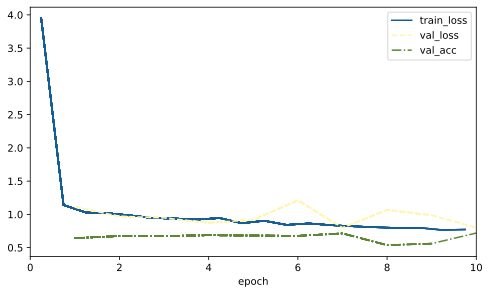

In [7]:
trainer.fit(model, isic_data)

In [26]:
t = model.board.data['val_acc']
t

[Point(x=1.0, y=0.6420384459197521),
 Point(x=2.0, y=0.6748817842453718),
 Point(x=3.0, y=0.6740851160138845),
 Point(x=4.0, y=0.6867804285138845),
 Point(x=5.0, y=0.6815378293395042),
 Point(x=6.0, y=0.6773231904953718),
 Point(x=7.0, y=0.7137643918395042),
 Point(x=8.0, y=0.5372121706604958),
 Point(x=9.0, y=0.5604440793395042),
 Point(x=10.0, y=0.7193153779953718)]

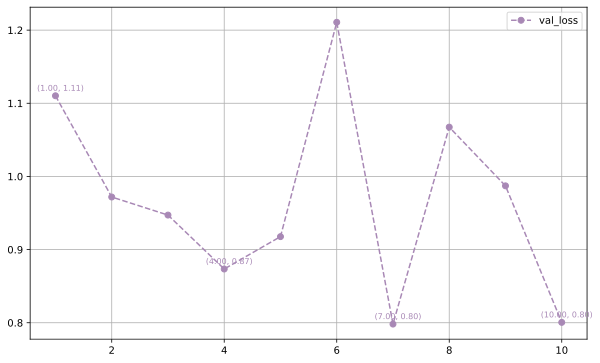

In [74]:
from matplotlib import pyplot as plt

def draw_his(data, xlabel=None, ylabel=None, xlim=None,
                 ylim=None, xscale='linear', yscale='linear',
                 ls=['-*', '--o', '-.v', ':h'], colors=['#155E95', '#A888B5', '#5D8736', '#C30E59'],
                 fig=None, axes=None, figsize=(12, 5), display=True, show_coords=False,
                 coord_interval=3, plot_keys=None):

    plot_keys = plot_keys or list(data.keys())
    for key in plot_keys:
        if key not in data:
            print(f"Warning: Key '{key}' not found in data.")
            continue

    if fig is None:
        fig, axes = plt.subplots(figsize=figsize)
    plt_lines, labels = [], []
    for (k, v), ls, color in zip(data.items(), ls, colors):
        if k not in plot_keys: continue
        x, y = [p.x for p in v], [p.y for p in v]
        plt_lines.append(plt.plot(x, y, ls, color=color)[0])
        labels.append(k)

        if show_coords:
            for i, (x_i, y_i) in enumerate(zip(x, y)):
                if i % coord_interval != 0: continue
                axes.annotate(f'({x_i:.2f}, {y_i:.2f})', xy=(x_i, y_i),
                              textcoords="offset points", xytext=(5, 5),
                              ha='center', fontsize=8, color=color)

    axes = axes if axes else plt.gca()
    if xlim: axes.set_xlim(xlim)
    if ylim: axes.set_ylim(ylim)
    if xlabel: axes.set_xlabel(xlabel)
    if ylabel: axes.set_ylabel(ylabel)
    axes.set_xscale(xscale)
    axes.set_yscale(yscale)
    axes.legend(plt_lines, labels)
    plt.grid(True)  # 启用网格
    if display: plt.show()

draw_his(model.board.data, figsize=(10, 6), show_coords=True, plot_keys=['val_loss'])
